# **필요한 라이브러리 불러오기**
***

In [987]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Dataset 불러오기**
***

In [988]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [989]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [990]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


# **Dataset 살펴보기**
***

In [991]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [992]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


### _판단_

* PassengerId, Cabin은 분석을 위해 문자열을 분리
* CryoSleep, VIP는 bool 값이므로 데이터타입을 변경
* Age는 나이이므로 int 형으로 변환
* Name은 필요없는 컬럼이니 삭제하기

# **데이터 이해하기**
***

### _사용할 함수 정의_

In [993]:
def positive_num_split(dataframe: pd.DataFrame, col: str, div_num: int, new_col_name: str) -> pd.DataFrame:
    """
    데이터 프레임에서 한 컬럼의 수를 원하는 수로 나누고 분류하여 새 데이터 프레임으로 반환하는 함수
    :param dataframe: 데이터 프레임
    :param col: 나눌 컬럼의 이름
    :param div_num: 나눌 숫자
    :param new_col_name: 결과를 담을 새 컬럼의 이름
    :return: 새로운 데이터 프레임
    """
    # 음수 예외 처리 필요
    # 데이터 프레임을 생성하는 기능, 숫자를 나누는 기능, 함수 분리 필요
    lst = []
    for i in dataframe[col]:
        if pd.isna(i):
            lst.append(None)
        elif i >= 0:
            range_num = int(i) // div_num
            lst.append(f"{range_num * div_num}-{(range_num + 1) * div_num}")
    return pd.DataFrame(lst, columns=[new_col_name])

In [994]:
def str_split_grouping(dataframe: pd.DataFrame, col: str, split_str: str) -> None:
    """
    데이터 프레임에서 컬럼의 데이터 문자열을 문자 기준으로 분리, 기존 컬럼 삭제 후 새 컬럼들로 반환하는 함수
    :param dataframe: 데이터 프레임
    :param col: 문자열을 분리할 컬럼
    :param split_str: 분리할 기준을 나타내는 문자
    :return: 미완성 함수라 없음
    """
    # 함수가 너무 많은 기능을 가지고 있음 분리 필요
    # 리턴 값이 없음
    # 재사용 못함
    dataframe[['group', 'member']] = dataframe[col].str.split(split_str, expand=True)
    group_size = dataframe.groupby('group').size()
    grouping_member = set(group_size[group_size > 1].index)
    dataframe['solo'] = ~dataframe['group'].isin(grouping_member)
    dataframe['group_size'] = dataframe['group'].map(group_size).fillna(0).astype(int)
    dataframe.drop(col, axis=1, inplace=True)

### *PassengerId 문자열 '\_'기준으로 분리시키기*

In [995]:
str_split_grouping(train, 'PassengerId', '_')
str_split_grouping(test, 'PassengerId', '_')

### *Cabin 문자열 '/'기준으로 분리시키기*

In [996]:
train[['deck', 'num', 'side']] = train['Cabin'].str.split('/', expand=True)
test[['deck', 'num', 'side']] = test['Cabin'].str.split('/', expand=True)

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

### _중복된 데이터 확인하기_

In [997]:
train.duplicated().sum()

0

In [998]:
test.duplicated().sum()

0

### _결측값 수 확인하기_

In [999]:
train.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
num             199
deck            199
side            199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
Transported       0
group             0
member            0
solo              0
group_size        0
dtype: int64

In [1000]:
test.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
side            100
deck            100
num             100
ShoppingMall     98
Name             94
VIP              93
CryoSleep        93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
member            0
solo              0
group_size        0
group             0
dtype: int64

### _판단_

* 데이터크기에 비해 결측값이 작으므로 형 변환을 위해 CryoSleep, VIP, Age 컬럼을 먼저 조사할 필요가 있음 

### _가정_

* 나이에 따라서 다른 차원으로 이동했을 가능성이 있다.
* VIP 여부에 따라 돈을 많이 쓴 사람은 더 안전하기 때문에 실종되지 않았을 가능성이 있다.
* CryoSleep 여부에 따라 동면 상태인 경우 안전하게 목적지에 도착했을 것이다.

# **Dataset 살펴보기**
***

### _Age와 Transported의 관계에 대해서 조사하기_

<Axes: xlabel='Age'>

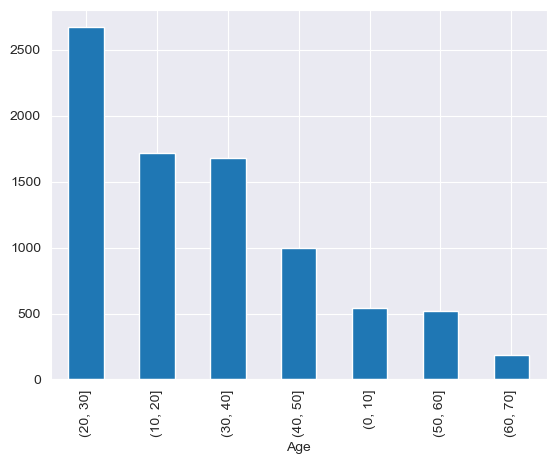

In [1001]:
# 탑승한 승객의 가장 많은 나이대 찾기
pd.cut(train['Age'], bins=range(0, int(train['Age'].max())+1, 10)).value_counts().plot(kind='bar')

<Axes: xlabel='age range', ylabel='count'>

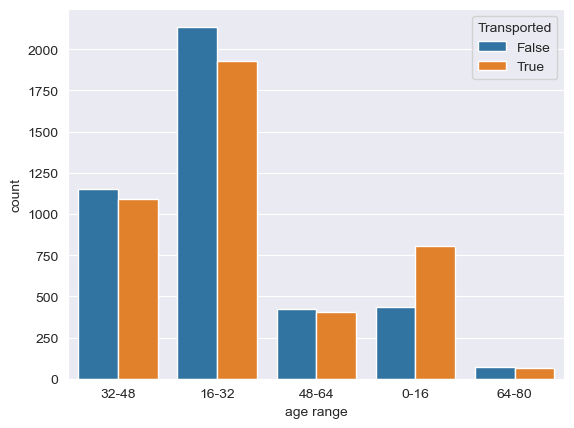

In [1002]:
# 탑승한 연령을 16세로 나누어 도착 여부 확인하기
sep_age = positive_num_split(dataframe=train, col='Age', div_num=16, new_col_name='age range')
sns.countplot(x='age range', hue='Transported', data=sep_age.join(train))

<Axes: xlabel='Age', ylabel='Count'>

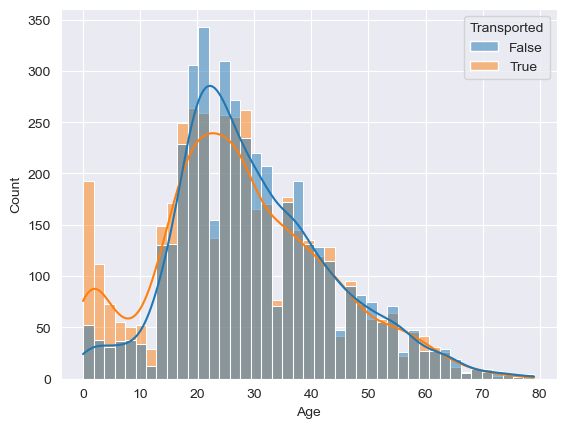

In [1003]:
# 나이와 도착 여부를 한눈에 확인하기
sns.histplot(x='Age', data=train, hue='Transported', kde=True)

### _분석_

* 가장 많은 승객은 10대 후반에서 30대 초반이다.
* 0에서 18세 승객은 실종되지 않을 가능성이 크다.
* 가장 많은 승객인 20대~30대는 목적지에 실종될 가능성이 크다.
* 30대 후반부터 실종률이 큰 그룹이 있으나 대부분 도착할 확률이 실종률과 비슷하다

### _판단_

* 특정 나이대에서 도착률과 실종률은 어느 정도 관계가 있는 것 같다.

### _VIP와 Transported의 관계에 대해서 조사하기_

<Axes: xlabel='VIP', ylabel='count'>

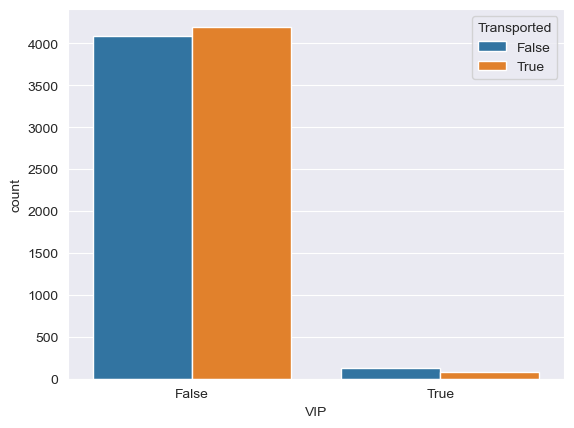

In [1004]:
sns.countplot(x='VIP', data=train, hue='Transported')

<Axes: xlabel='Transported'>

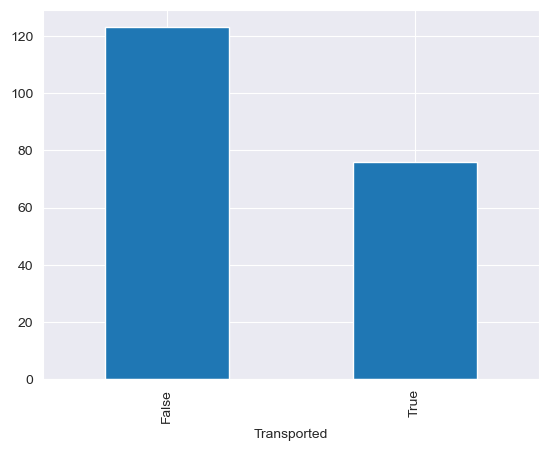

In [1005]:
# VIP인 사람들의 도착률
train[train['VIP'] == True]['Transported'].value_counts().plot(kind='bar')

### _분석_

* 탑승한 승객 중 대다수가 VIP가 아니며 가정과는 다르게 VIP가 더 많이 실종되는 것처럼 보이나 수가 너무 적어서 유의미한 데이터는 아닌 것 같다